## NAMA : Muhammad Reza Giovanni

# INPUT TENSORFLOW LIBRARY

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.3.0


# IMPORT DATASET

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /content/rockpaperscissors.zip

--2020-09-05 18:29:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/content/rockpaperscissors.zip’

/content/rockpapers 100%[===================>] 307.92M  9.52MB/s    in 41s     

2020-09-05 18:29:52 (7.55 MB/s) - ‘/content/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
import zipfile,os

In [5]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
base_dir = '/content/rockpaperscissors/rps-cv-images'

# IMAGE DATA GENERATOR

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
data = ImageDataGenerator(rescale=1./255,
                          shear_range=0.2,
                          horizontal_flip=True,
                          rotation_range=20,
                          validation_split=0.4)

train_data = data.flow_from_directory(directory=base_dir,
                                      target_size=(150, 150),
                                      class_mode='categorical',
                                      shuffle=True,
                                      subset = 'training'
                                      )

val_data = data.flow_from_directory(directory=base_dir,
                                    target_size=(150, 150),
                                    class_mode='categorical',
                                    subset = 'validation'
                                    )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# THE MODEL

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding ='same', activation='relu', input_shape=(150, 150, 3)), #MENAMBAHKAN PADDING SAME PADA SETIAP CONV LAYER
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), padding ='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), padding ='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), padding ='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        3

# THE CALLBACKS

In [11]:
from keras.callbacks import ReduceLROnPlateau, Callback, EarlyStopping

In [12]:
# ReduceLROnPlateau CallBack
lr_reduce = ReduceLROnPlateau(monitor='val_loss', #MENGGANTI MONITOR DARI VAL_ACC KE VAL_LOSS
                              verbose=1, 
                              min_lr=0.000003,
                              patience=1          #MENGGANTI PATIENCE DARI 2 MENJADI 1
)

In [13]:
# on_epoch_end CallBack
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if((logs.get('acc')>0.98) and (logs.get('val_loss')<=0.1)): 
      print(" ")
      print("(Akurasi > 98%) dan (val_loss <= 10%), maka training dihentikan")
      self.model.stop_training = True

oee_callback = myCallback()

In [14]:
# EarlyStopping Callback
earlystop = EarlyStopping(monitor='val_loss', 
                          patience=3, 
                          verbose=1,
)

In [15]:
callback = [lr_reduce, oee_callback, earlystop]

# COMPILE

In [16]:
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

In [17]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['acc']
)

# FIT

In [18]:
hist = model.fit(train_data,
                 epochs=25,
                 verbose=1, 
                 callbacks=callback,
                 validation_data=val_data
)

Epoch 1/25
42/42 [==============================] - 51s 1s/step - loss: 0.9931 - acc: 0.4680 - val_loss: 0.5906 - val_acc: 0.7254
Epoch 2/25
42/42 [==============================] - 49s 1s/step - loss: 0.4603 - acc: 0.8143 - val_loss: 0.4155 - val_acc: 0.8684
Epoch 3/25
42/42 [==============================] - 49s 1s/step - loss: 0.3038 - acc: 0.8965 - val_loss: 0.2332 - val_acc: 0.9291
Epoch 4/25
42/42 [==============================] - 49s 1s/step - loss: 0.2816 - acc: 0.9079 - val_loss: 0.1904 - val_acc: 0.9405
Epoch 5/25
42/42 [==============================] - 49s 1s/step - loss: 0.2258 - acc: 0.9216 - val_loss: 0.1745 - val_acc: 0.9416
Epoch 6/25
42/42 [==============================] - 49s 1s/step - loss: 0.1739 - acc: 0.9414 - val_loss: 0.1341 - val_acc: 0.9519
Epoch 7/25
42/42 [==============================] - ETA: 0s - loss: 0.1485 - acc: 0.9475
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
42/42 [==============================] - 49s 1s/st

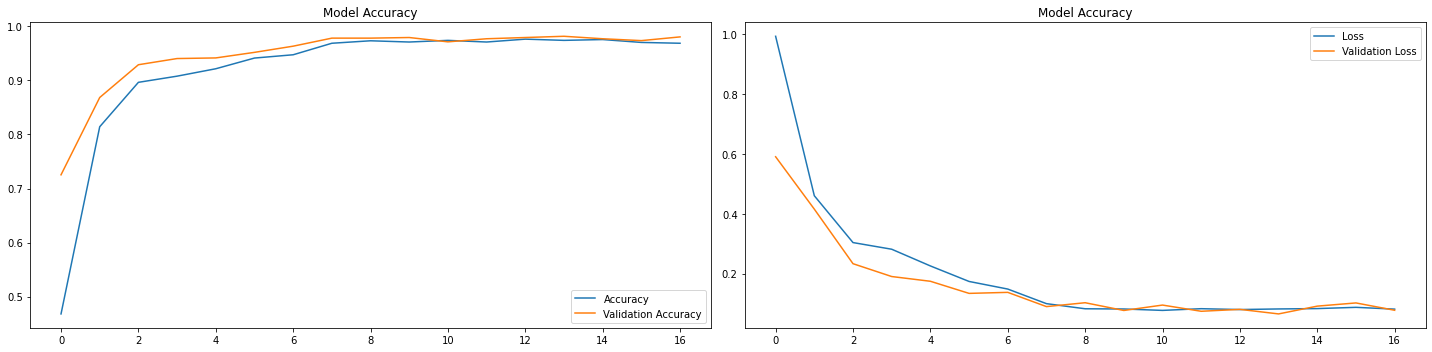

In [19]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.plot(hist.history['acc'])
ax1.plot(hist.history['val_acc'])
ax1.set_title('Model Accuracy')
ax1.legend(["Accuracy", "Validation Accuracy"])

ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.set_title('Model Accuracy')
ax2.legend(["Loss","Validation Loss"])

plt.tight_layout()

# PREDICT

Saving photo_2020-08-31_12-40-22.jpg to photo_2020-08-31_12-40-22.jpg
photo_2020-08-31_12-40-22.jpg
scissor


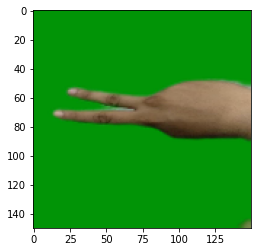

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
print(fn)
if classes[0][0]==1:
  print('paper')
elif classes[0][1]==1:
  print('rock')
elif classes[0][2]==1:
  print("scissor")

In [21]:
classes

array([[0., 0., 1.]], dtype=float32)